In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow.keras import layers as KL
from tensorflow.keras import utils as KU
from tensorflow.keras import models as KM
from tensorflow import keras
import logging
from augment import *
logging.getLogger('tensorflow').setLevel(logging.ERROR)  # suppress warnings

In [2]:
trainA = KU.image_dataset_from_directory("../data/selfie2anime/trainA", labels=None)

Found 3400 files belonging to 1 classes.


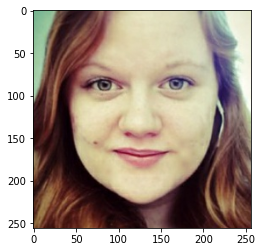

In [3]:
for f in trainA.take(1):
    plt.imshow(f[0].numpy().astype("int"))

In [4]:
model = KM.Sequential([RandomAffine(rotation=0.5, translation=10, resize_to=(286, 286), crop=(256, 256), fill_mode="nearest", interpolation="bilinear")])

CPU times: total: 109 ms
Wall time: 120 ms


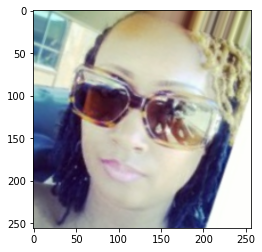

In [26]:
%%time
out = model(f)
plt.imshow(out[0].numpy().astype('int'))

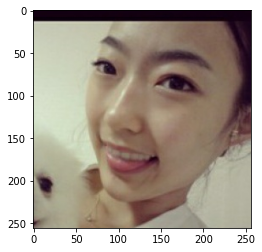

In [10]:
image = next(iter(trainA))[0]
plt.imshow(image.numpy().astype('int'))

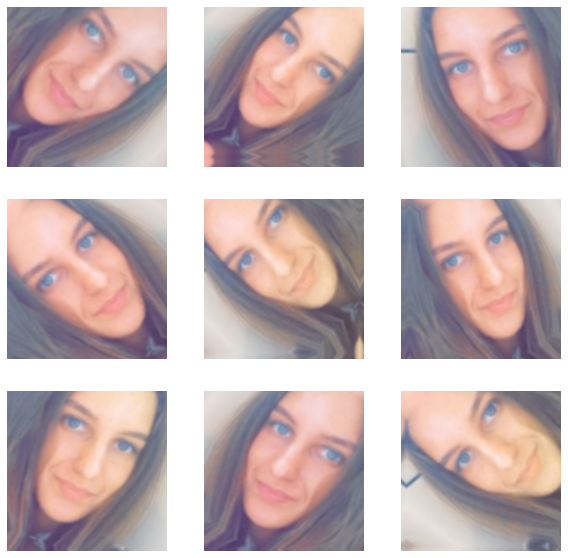

In [24]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = apply_augmentations(tf.expand_dims(image, axis=0))
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0].numpy().astype('int'))
  plt.axis("off")